This Jupyter noteboook works through some version of Rosenblatt's perceptron algorithm "by hand". That is, it makes no attempt at efficiency and instead aims for explicitness. The intent is that you can go through and execute the parts of the algorithm and see what's happening.

Remember that the perceptron algorithm is a binary classification method.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit

Our fake data:

In [40]:
X = np.array([[1,1,1],[3,3,1],[1,-1,-1],[-2,1,-1],[2,-3,-1]])
#label = [1,1,-1,-1,-1]

In [41]:
X_x = X[:,0]
X_y = X[:,1]
label = X[:,2]

Choose initial betas. We're using $f(x,y) = b_0 + b_1*x+b_2*y$, and here graphing $f(x,y)=0$.

In [80]:
b = [1,1,1]
t = np.arange(-2,4)
def line_coords(b):
    if b[2] != 0:
        x = t
        y = (-b[0]-b[1]*x)/b[2]
        return [x,y]
    elif b[1] != 0:
        x = -b[0]/b[1]
        y = t
        return [x,y]
    else:
        return "error!"



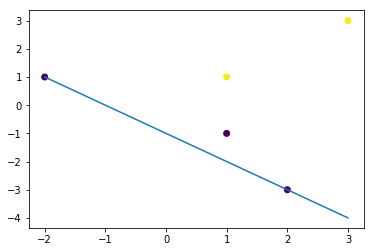

In [82]:
def show_me_my_line(b):
    plt.scatter(X_x,X_y, c = label)
    plt.plot(line_coords(b)[0], line_coords(b)[1], '-')
    plt.show()
show_me_my_line(b)

Clearly this is a terrible separating hyperplane, and clearly the data is separable.

Now start the perceptron part: we need to evaluate $f(x,y)$ at each point and determine whether the sign matches the labels.

In [99]:
def hyperplane_function(A,b):
    return b[0]+b[1]*A[0]+b[2]*A[1]
    
def misclassified(A,b):
    if np.sign(b[0]+b[1]*A[0]+b[2]*A[1]) == np.sign(A[2]):
        return True
    else:
        return False

In [106]:
def misclassified_list(array,b):
    return [np.sign(b[0]+b[1]*A[0]+b[2]*A[1]) == np.sign(A[2]) for A in array]

We could iterate through all the points in our data set and determine whether or not they are misclassified, or we could just be lazy and stop at the first misclassified point and adjust our b vector using gradient descent. Let's set $\rho$, the learning rate, then get started:

In [118]:
rho = 1

In [119]:
misclass_index = [i for i, x in enumerate(misclassified_list(X,b)) if not x]
# this gives indices of all the misclassified points given the current b

In [120]:
X[misclass_index[0]]

array([ 1, -1, -1])

Recall that to change our b vector given a misclassified point $i$ we update by adjusting $b_0$ to $y_i \cdot \rho + b_0$, and then adjusting $b_j$ for $j>0$ to $b_j+ \rho y_i x_j$ for a datapoint $\vec{x}$.

In [136]:
b=b+rho* X[misclass_index[0]][2] *np.array([1,X[misclass_index[0]][0],X[misclass_index[0]][1]])

Let's plot the new separating line and evaluate its goodness.

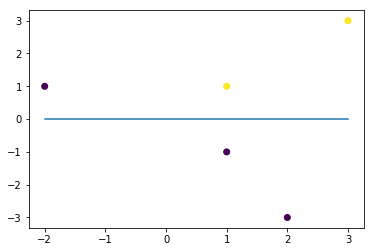

In [141]:

show_me_my_line(b)

Still not good for my example. Ok, find the misclassified points, adjust b, and plot again.

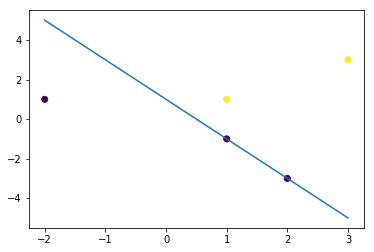

In [142]:
misclass_index = [i for i, x in enumerate(misclassified_list(X,b)) if not x]
b=b+rho* X[misclass_index[0]][2] *np.array([1,X[misclass_index[0]][0],X[misclass_index[0]][1]])
show_me_my_line(b)

This is interesting! In my version, I get a line going through several of the points. This doesn't actually classify these points. So let's try again.

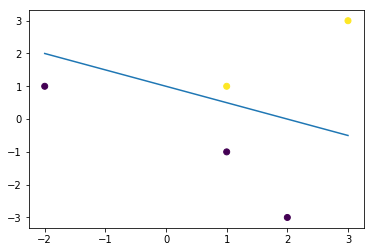

In [143]:
misclass_index = [i for i, x in enumerate(misclassified_list(X,b)) if not x]
b=b+rho* X[misclass_index[0]][2] *np.array([1,X[misclass_index[0]][0],X[misclass_index[0]][1]])
show_me_my_line(b)

Now I get a separating line, and the algorithm stops.

What happens if you change the learning rate or the initial b? Try it.